In [1]:
import cv2
import skimage.io
from classes import *
from helpers import *
from functions import *
import matplotlib.pyplot as plt

img = skimage.io.imread('dock.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
offset = 926//2
y_center = 1080//2
x_center = 1920//2

cropped = img[y_center-offset:y_center+offset,x_center-offset:x_center+offset,:]
cropped_gray = img_gray[y_center-offset:y_center+offset,x_center-offset:x_center+offset]

size,scalingFactor,coeff_array,index_array,size_array,kernel_map = loadPickle('retina.pkl')

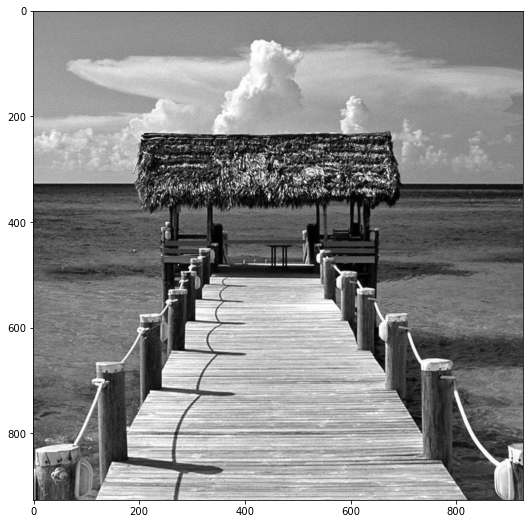

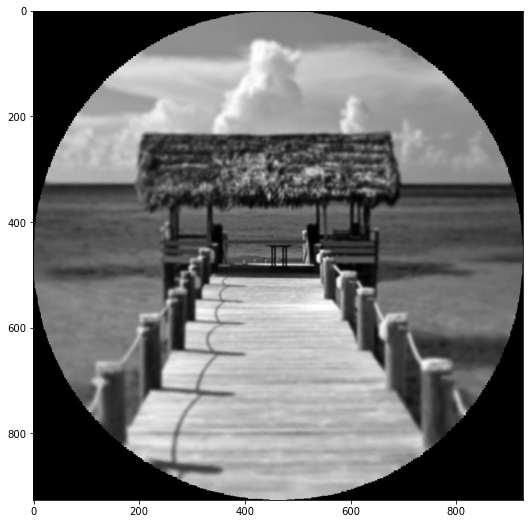

In [2]:
R = Retina('retina.pkl')
R.calibrate(img_gray)
R.sample(img_gray)
R.backProject()
plt.figure(figsize=(9,9))
plt.imshow(cropped_gray, cmap='gray')
plt.show()
plt.figure(figsize=(9,9))
plt.imshow(get_retinaBackProjected_GRAY(R) ,cmap='gray')
plt.show()

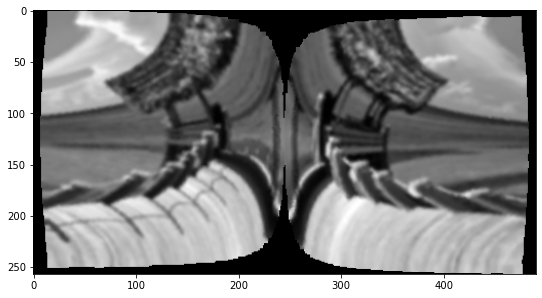

In [3]:
C = Cortex('cortex.pkl')
C.calibrate(R)
C.backProject(R.getResult())
plt.figure(figsize=(9,9))
plt.imshow(get_cortexBackProjected_GRAY(C) ,cmap='gray')
plt.show()

In [4]:
%%timeit
R.setFixation(960,540)
R.setFixation(463,463)

10.2 µs ± 258 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
%%timeit
R.setFixation(0,0)
R.setFixation(960,540)

106 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit
R.sample(img_gray)

8.59 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%%timeit
R.backProject()

19.7 ms ± 301 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
%%timeit
C.backProject(R.getResult())

4.49 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


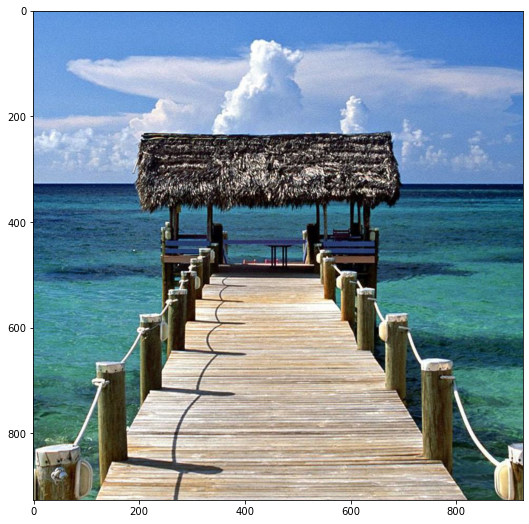

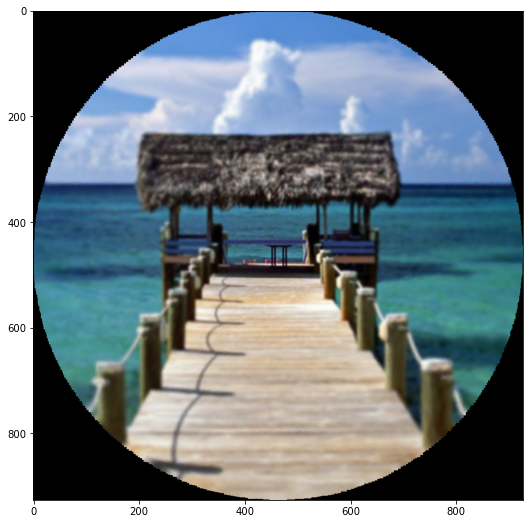

In [9]:
R.calibrate(img)
R.sample(img)
R.backProject()
plt.figure(figsize=(9,9))
plt.imshow(cropped)
plt.show()
plt.figure(figsize=(9,9))
plt.imshow(get_retinaBackProjected_RGB(R))
plt.show()

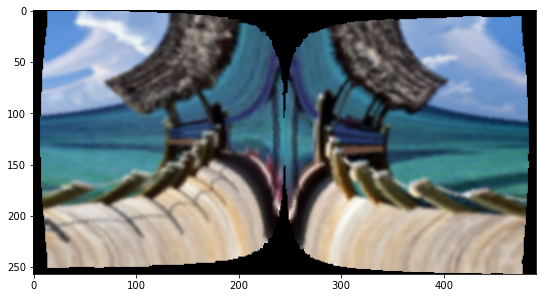

In [10]:
C = Cortex('cortex.pkl')
C.calibrate(R)
C.backProject(R.getResult())
plt.figure(figsize=(9,9))
plt.imshow(get_cortexBackProjected_RGB(C))
plt.show()

In [11]:
%%timeit
R.sample(img)

22.9 ms ± 852 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%%timeit
R.backProject()

49.6 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%%timeit
C.backProject(R.getResult())

11.9 ms ± 342 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
